*Trabajos y salarios en el mundo*

El dataset a continuación contiene información sobre trabajos y posiciones laborales en distintos países: Australia, Canadá, China, Estados Unidos y Reino Unido.

Recoge información sobre género, años de experiencia y raza/etnia. https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country/

Nuestra variable objetivo es el salario anual en dólares (USD).

A priori, las principales hipótesis del caso son:
- A mayor experiencia, mayor salario
- A mayor edad, mayor salario
- A mayor nivel educativo, mayor salario
- El género tiene incidencia en el salario, por lo que el género femenino gana menos que el masculino


In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import LabelEncoder

In [140]:
df=pd.read_csv("jobs.csv")

In [141]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
#1 is male, 0 is female.

In [142]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,1,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,0,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,1,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,0,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,1,2,Director,20.0,200000.0,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,0,3,Director of Marketing,20.0,200000.0,UK,Mixed,0
6680,32.0,1,0,Sales Associate,3.0,50000.0,Australia,Australian,0
6681,30.0,0,1,Financial Manager,4.0,55000.0,China,Chinese,0
6682,46.0,1,2,Marketing Manager,14.0,140000.0,China,Korean,0


                          Age    Gender  Education Level  Years of Experience  \
Age                  1.000000  0.117401         0.596380             0.937609   
Gender               0.117401  1.000000         0.022621             0.098809   
Education Level      0.596380  0.022621         1.000000             0.613165   
Years of Experience  0.937609  0.098809         0.613165             1.000000   
Salary               0.728343  0.127276         0.645444             0.810942   
Senior               0.334070  0.038852         0.273466             0.317877   

                       Salary    Senior  
Age                  0.728343  0.334070  
Gender               0.127276  0.038852  
Education Level      0.645444  0.273466  
Years of Experience  0.810942  0.317877  
Salary               1.000000  0.223636  
Senior               0.223636  1.000000  


<Axes: >

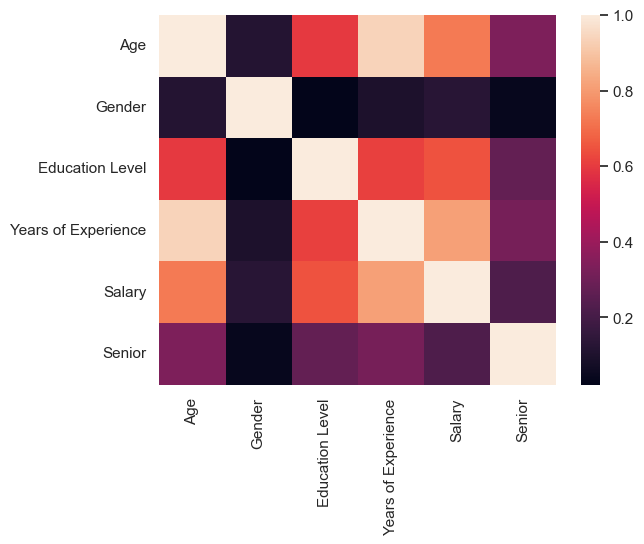

In [143]:
corrmat = df.corr(method="pearson", numeric_only=True)
print (corrmat)
sns.heatmap (corrmat)

In [156]:
from statsmodels import regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [145]:
df.dtypes

Age                    float64
Gender                   int32
Education Level          int64
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
Senior                   int64
dtype: object

In [146]:
round(df.describe())

,Age,Gender,Education Level,Years of Experience,Salary,Senior
count,6684.0,6684.0,6684.0,6684.0,6684.0,6684.0
mean,34.0,1.0,2.0,8.0,115307.0,0.0
std,8.0,0.0,1.0,6.0,52807.0,0.0
min,21.0,0.0,0.0,0.0,350.0,0.0
25%,28.0,0.0,1.0,3.0,70000.0,0.0
50%,32.0,1.0,1.0,7.0,115000.0,0.0
75%,38.0,1.0,2.0,12.0,160000.0,0.0
max,62.0,1.0,3.0,34.0,250000.0,1.0


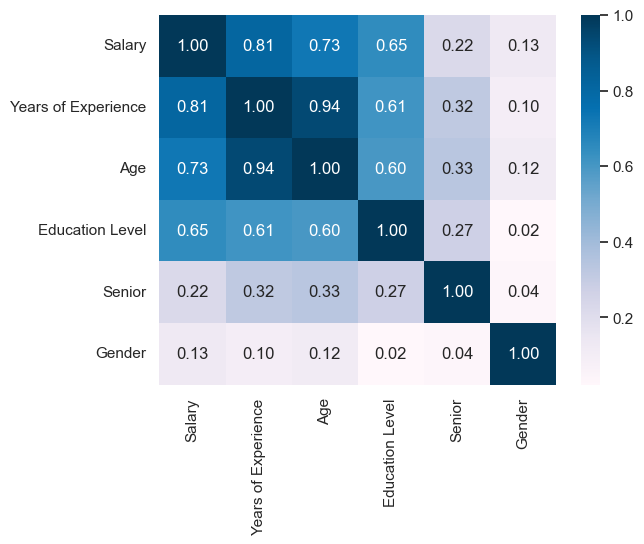

In [147]:
#sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
correlation_matrix = df.corr(numeric_only=True)
target_variable = 'Salary'
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sorted_numerical_cols = correlation_matrix[target_variable].abs().sort_values(ascending=False).index
numerical_order = [col for col in sorted_numerical_cols if col in numerical_cols]
sorted_cols = numerical_order + list(set(correlation_matrix.columns) - set(numerical_order))
sorted_correlation_matrix = correlation_matrix.loc[sorted_cols, sorted_cols]
sns.heatmap(sorted_correlation_matrix, annot=True, cmap='PuBu', fmt=".2f")
plt.show()

**Correlación entre las variables numéricas**

Obvservamos una gran correlación entre los salarios y los años de experiencia, así como también con la edad y el nivel educativo. Mientras tanto, el género muestra un nivel de correlación relativamente bajo en comparación.

Text(0.5, 0, 'Edad')

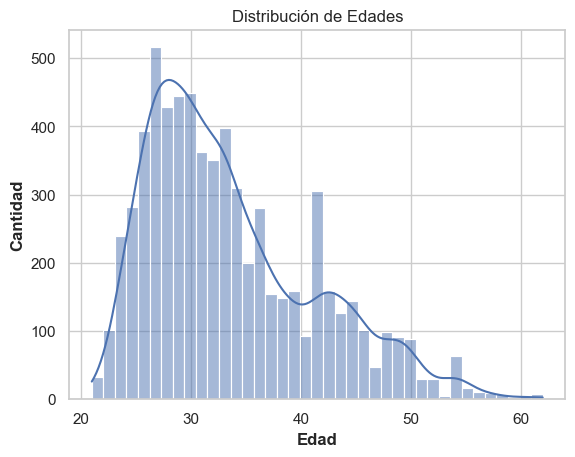

In [148]:
sns.histplot(data=df, x="Age", kde=True).set(title="Distribución de Edades")
plt.grid(True)
plt.gca().set_facecolor('white')
plt.ylabel("Cantidad", fontweight='bold')
plt.xlabel("Edad", fontweight='bold')

[Text(0, 0, 'Femenino'), Text(1, 0, 'Masculino')]

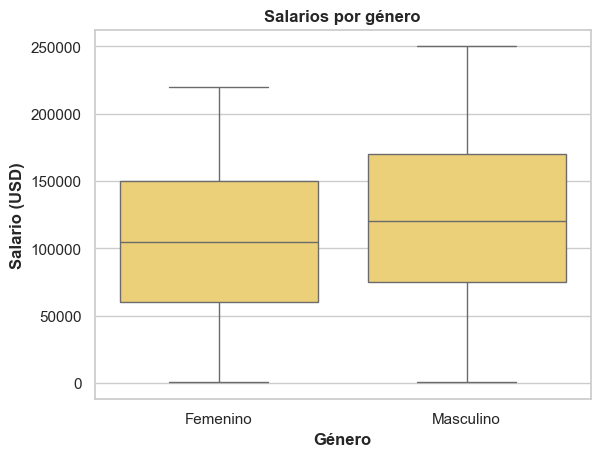

In [163]:
sns.set(style="whitegrid")
ax = sns.boxplot(data=df, x='Gender', y='Salary', color='#ffd966')
plt.gca().set_facecolor('white')
ax.set(title="Salarios por género", ylabel="Salario (USD)", xlabel="Género")
ax.title.set_fontweight('bold')
ax.yaxis.label.set_fontweight('bold')
ax.xaxis.label.set_fontweight('bold')
ax.set_facecolor('white')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Femenino', 'Masculino'])

**Relación entre géneros y salarios**

En términos generales, el rango de salarios de los hombres es algo mayor al de las mujeres, si bien el género no parece ser tan relevante como la edad o la experiencia a la hora de determinar el salario de los empleados. 

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Text(0.5, 0, 'Años de Experiencia')

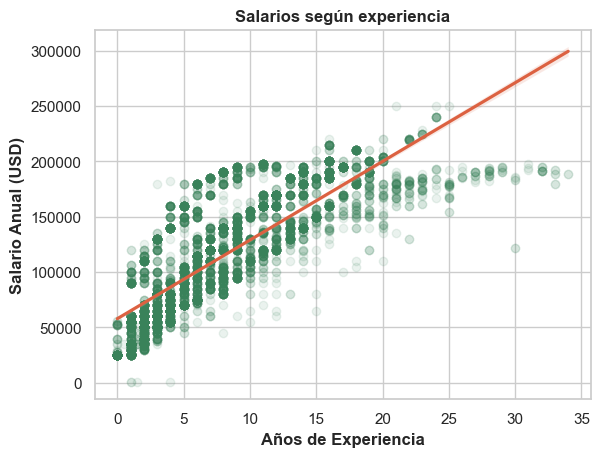

In [151]:
sns.regplot(data=df,y='Salary',x='Years of Experience', color='#39825a', scatter_kws={'alpha': 0.1}, line_kws={'color': '#dc6141'})
plt.title("Salarios según experiencia", fontweight='bold')
plt.grid(True)
plt.gca().set_facecolor('white')
plt.ylabel("Salario Anual (USD)", fontweight='bold')
plt.xlabel("Años de Experiencia", fontweight='bold')

**Correlación entre años de experiencia y salarios**

Como vimos anteriormente, la correlación entre salario y la experiencia es alta. La regresión lineal muestra esta relación positiva y una pendiente elevada, es decir, confirma en parte una de nuestras hipótesis iniciales.

Text(0.5, 0, 'Edad')

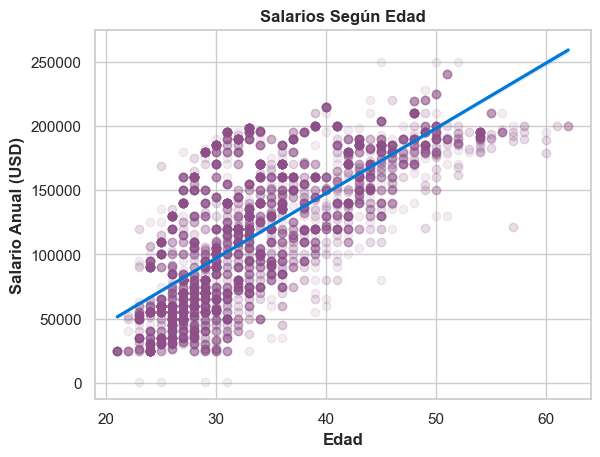

In [152]:
sns.regplot(data=df,y='Salary',x='Age', color='#8e4f89', scatter_kws={'alpha': 0.1}, line_kws={'color': '#0078d7'})
plt.title("Salarios Según Edad", fontweight='bold')
plt.grid(True)
plt.gca().set_facecolor('white')
plt.ylabel("Salario Anual (USD)", fontweight='bold')
plt.xlabel("Edad", fontweight='bold')

**Correlación entre edad y salarios**

Este gráfico con regresión lineal muestra relación positiva y una pendiente elevada para el caso de edad y salario, es decir, confirma otra de nuestras hipótesis.

C:\Users\tcola\AppData\Local\Temp\ipykernel_12268\3976644864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Education Level', y='Salary', order=[0,1,2,3], palette='Set1')
C:\Users\tcola\AppData\Local\Temp\ipykernel_12268\3976644864.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Secundario', 'Terciario', 'Universitario', 'Posgrado'])


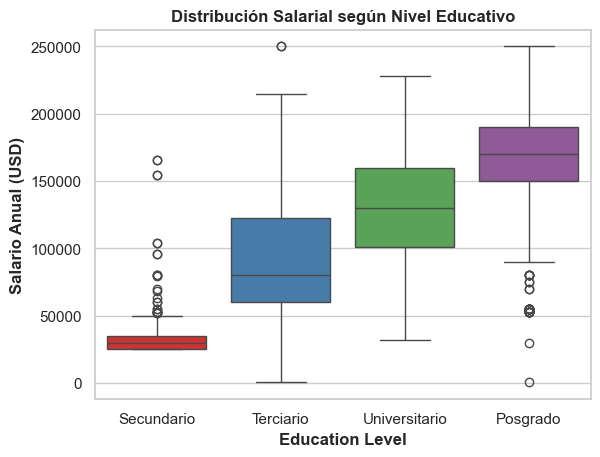

In [153]:
sns.set(style="whitegrid")
ax = sns.boxplot(data=df, x='Education Level', y='Salary', order=[0,1,2,3], palette='Set1')
ax.set(title="Distribución Salarial según Nivel Educativo", ylabel="Salario Anual (USD)", xlabel="Education Level")
ax.title.set_fontweight('bold')
ax.yaxis.label.set_fontweight('bold')
ax.xaxis.label.set_fontweight('bold')
ax.set_xticklabels(['Secundario', 'Terciario', 'Universitario', 'Posgrado'])
ax.set_facecolor('white')
plt.show()

**Distribución de salarios según nivel educativo**

El gráfico de caja permite ver el rango salarial de los empleados según su nivel educativo. Podemos ver que conforme aumenta el nivel educativo también lo hace el salario. Existen algunos casos que no cumplen con este postulado, pero son excepciones y no la regla.

In [178]:
#Modelo de regresión lineal

features = df.drop("Salary", axis=1)
target = df["Salary"]

categorical_columns = features.select_dtypes(include=['object']).columns
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
categorical_columns_train = x_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns_train)
    ],
    remainder='passthrough'
)

x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

model = LinearRegression()
model.fit(x_train_transformed, y_train)
y_pred_train = model.predict(x_train_transformed)
r2 = r2_score(y_train, y_pred_train)

print(f"R²: {r2}")

R²: 0.8221726299643778


**Conclusiones**

El coeficiente de determinación (R²) es alto. Esto significa que nuestra variable dependiente Salarios se ve determinada en un 82,22% por el resto de las variables independientes numéricas usadas en este modelo, y por ende estas son relevantes a la hora de predecir los salarios.
Entonces, podemos afirmar que el nivel de los salarios está estrechamente relacionado con la experiencia, la edad y el nivel educativo de los trabajadores.

